In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import stats
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import files

upload = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [ ]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv", header='infer')

In [ ]:
print('Number of instances = ',data.shape[0])
print('Number of attributes = ',data.shape[1],"\n")
# To get then number of missing values
print(data.isna().sum())

Number of instances =  5110
Number of attributes =  12 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# Impute missing values in the 'bmi' column with the mean
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# Calculate the mean of the 'bmi' attribute
mean_bmi = data['bmi'].mean()

print("Mean BMI:", mean_bmi)
# Missing Values Sorted
print(data.isna().sum()==0)

Mean BMI: 28.893236911794663
id                   True
gender               True
age                  True
hypertension         True
heart_disease        True
ever_married         True
work_type            True
Residence_type       True
avg_glucose_level    True
bmi                  True
smoking_status       True
stroke               True
dtype: bool


In [ ]:
for i in data.columns:
    if data[i].dtype == "object":
        print(data[i].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
old_instances = data.shape[0]
print('Number of old instances = ', old_instances)
drop_conditions = {
    'gender': 'Other',
    'smoking_status': 'Unknown',
    'work_type':'children'
}

for column_name, value in drop_conditions.items():
    filtered_data = data.loc[data[column_name] == value]
    data.drop(filtered_data.index, inplace=True)
    print(f"Dropped Data {value} for column {column_name}")
print(f"dropped {old_instances-data.shape[0]}")
print('Number of new instances = ', data.shape[0])

Number of old instances =  5110
Dropped Data Other for column gender
Dropped Data Unknown for column smoking_status
Dropped Data children for column work_type
dropped 1614
Number of new instances =  3496


In [ ]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data.shape[0]))

Number of rows before discarding duplicates = 3496
Number of rows after discarding duplicates = 3496


In [ ]:
rows_to_duplicate = data.sample(n=random.randint(50,500), replace=True)
data = pd.concat([data, rows_to_duplicate] * random.randint(10,200), ignore_index=True)

# Shuffle the DataFrame to mix the duplicated rows
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data.shape[0]))

Number of rows before discarding duplicates = 654588
Number of rows after discarding duplicates = 3496


In [ ]:
data.drop("id", axis=1, inplace=True)

In [ ]:
data['stroke'] = ['YES' if i == 1 else 'NO' for i in data['stroke']]

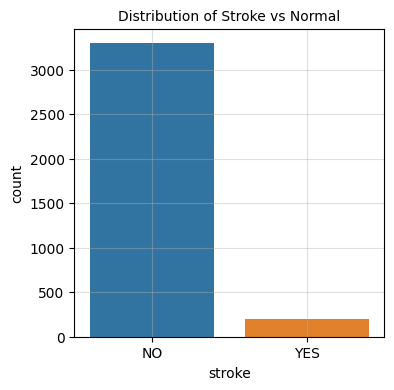

In [ ]:
# distribution of the label `stroke`
plt.figure(figsize=(4,4))
sns.countplot(data=data, x='stroke')
plt.title('Distribution of Stroke vs Normal', fontsize=10)
plt.grid(alpha=0.4)

In [ ]:
# Count the number of rows with stroke = 1 and stroke = 0
stroke_count = data[data['stroke'] == "YES"].shape[0]
Normal_count = data[data['stroke'] == "NO"].shape[0]

# Find the difference in counts and duplicate rows with stroke = 1
diff_count = Normal_count - stroke_count
rows_to_duplicate = data[data['stroke'] == "YES"].sample(n=diff_count, replace=True)

# Concatenate the duplicated rows with the original dataframe
data = pd.concat([data, rows_to_duplicate], ignore_index=True)

# Shuffle the DataFrame to mix the duplicated rows
data = data.sample(frac=1).reset_index(drop=True)


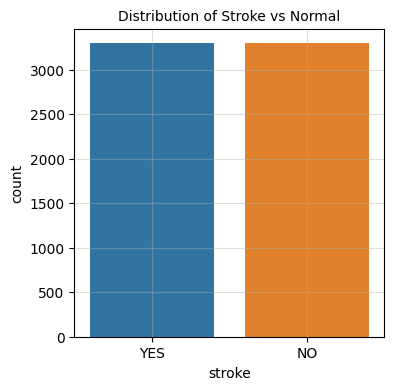

In [ ]:
# distribution of the label `stroke`
plt.figure(figsize=(4,4))
sns.countplot(data=data, x='stroke')
plt.title('Distribution of Stroke vs Normal', fontsize=10)
plt.grid(alpha=0.4)


In [ ]:
print('Number of rows after balancing:', data.shape)

Number of rows after balancing: (6588, 11)


In [ ]:
columns_to_standardize = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

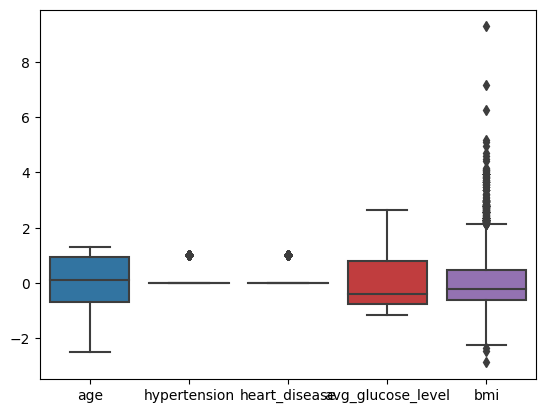

In [ ]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
sns.boxplot(data=data[numeric_columns])
plt.show()

In [ ]:
from scipy import stats

threshold = 5
# Identify and filter outliers
outliers = (np.abs(stats.zscore(data[numeric_columns])) > threshold).any(axis=1)

# Print or visualize the index of outlier values in the original dataset
print("Indices of Outlier Values:")
print(data.index[outliers])

# Print the number of rows before removing outliers
print('Number of rows before removing outliers = ', data.shape[0])

# Drop outliers from the original data
data_no_outliers = data[~outliers]

# Print the number of rows after removing outliers
print('Number of rows after removing outliers = ', data_no_outliers.shape[0])

# Check for NaN values after outlier removal
print("NaN values after outlier removal:")
print(data_no_outliers.isnull().sum())

# Update data with the cleaned dataset
data = data_no_outliers.copy()


Indices of Outlier Values:
Int64Index([1935, 3615, 4160, 4862, 5217], dtype='int64')
Number of rows before removing outliers =  6588
Number of rows after removing outliers =  6583
NaN values after outlier removal:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<ipython-input-24-b9964c2331df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


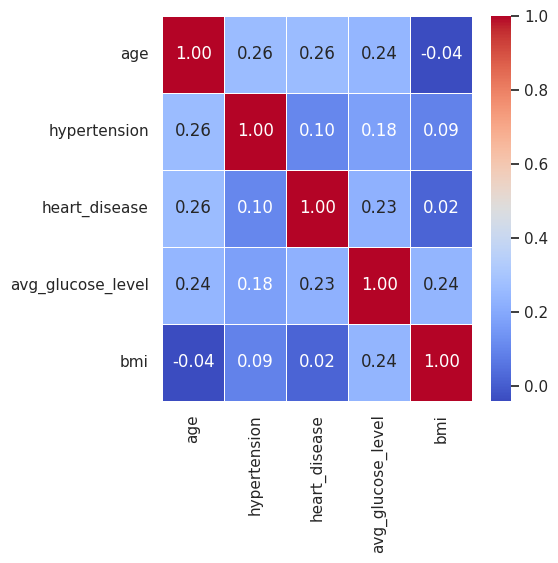

In [ ]:
correlation_matrix = data.corr()
sns.set(style="white")  # Set the style of the visualization
plt.figure(figsize=(5, 5))

# Creating a heatmap with a color map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.show()


In [ ]:

variance_per_attribute = data.var()
print("Variance for each attribute:")
print(variance_per_attribute)

Variance for each attribute:
age                  0.999556
hypertension         0.166503
heart_disease        0.109975
avg_glucose_level    0.999945
bmi                  0.966025
dtype: float64


<ipython-input-25-2e188d31619f>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance_per_attribute = data.var()


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,1.087634,0,0,Yes,Self-employed,Rural,-0.204040,0.043800,never smoked,YES
1,Female,-0.069807,0,0,No,Self-employed,Rural,-0.853987,-1.435239,never smoked,NO
2,Female,-0.345388,0,0,Yes,Private,Rural,-0.430782,-0.620258,never smoked,YES
3,Male,0.260890,0,1,Yes,Private,Rural,1.331751,0.904058,formerly smoked,YES
4,Female,-1.888643,0,0,No,Private,Urban,0.494847,-1.118302,never smoked,NO


In [ ]:
pd.crosstab([data['hypertension']],data['stroke'])

stroke,NO,YES
hypertension,,
0,2907,2287
1,382,1007


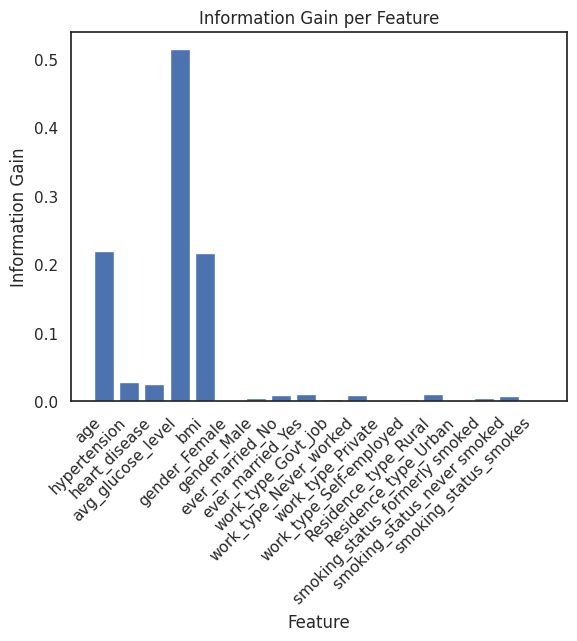

Information Gain for each feature

age  :  0.22024673882780266
hypertension  :  0.028858759220451224
heart_disease  :  0.024633099719183482
avg_glucose_level  :  0.5144228100958743
bmi  :  0.21628413921405865
gender_Female  :  0.0
gender_Male  :  0.0050270033353234655
ever_married_No  :  0.009294763089182867
ever_married_Yes  :  0.011041474475655289
work_type_Govt_job  :  0.003303729382095222
work_type_Never_worked  :  0.008814945824813458
work_type_Private  :  0.002642965603653291
work_type_Self-employed  :  0.00309792155011257
Residence_type_Rural  :  0.010400007583384552
Residence_type_Urban  :  0.0011870759430097078
smoking_status_formerly smoked  :  0.0043444312080771486
smoking_status_never smoked  :  0.007475303036535985
smoking_status_smokes  :  0.0


In [ ]:
y = data['stroke']
X = data.drop('stroke', axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Calculate information gain for the filtered data
information_gain = mutual_info_classif(X, y)

# Display bar plot
plt.bar(X.columns, information_gain)
plt.xlabel('Feature')
plt.ylabel('Information Gain')
plt.title('Information Gain per Feature')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Display information gain values
print("Information Gain for each feature\n")
for i in range(len(X.columns)):
    print(X.columns[i], " : ", information_gain[i])


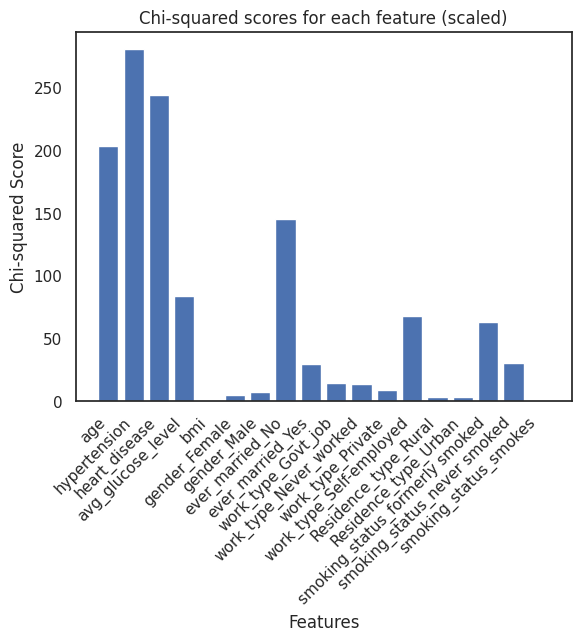

In [ ]:
# Create a copy of the original DataFrame
scaled_data = data.copy()

# Extract numerical columns for scaling
numerical_columns = scaled_data.select_dtypes(include='float64').columns

# Apply Min-Max scaling to numerical features
scaler = MinMaxScaler()
scaled_data[numerical_columns] = scaler.fit_transform(scaled_data[numerical_columns])

# Separate target variable and features in the scaled dataset
y_scaled = scaled_data['stroke']
X_scaled = scaled_data.drop('stroke', axis=1)

# One-hot encode categorical variables in the scaled dataset
X_scaled = pd.get_dummies(X_scaled)

# Calculate chi-squared scores and p-values for the scaled features
chi2_scores_scaled, p_values_scaled = chi2(X_scaled, y_scaled)

# Display chi-squared scores for each feature in the scaled dataset
plt.bar(X_scaled.columns, chi2_scores_scaled)
plt.title("Chi-squared scores for each feature (scaled)")
plt.xlabel("Features")
plt.ylabel("Chi-squared Score")
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
print("Variances of each feature:")
print(X.var())

variance_threshold = 0.01

# Apply variance thresholding
selector = VarianceThreshold(threshold=variance_threshold)
X_high_variance = selector.fit_transform(X)

# Print the remaining features after variance thresholding
selected_features = X.columns[selector.get_support()]
print("\nSelected features after variance thresholding:", selected_features)


Variances of each feature:
age                               0.999556
hypertension                      0.166503
heart_disease                     0.109975
avg_glucose_level                 0.999945
bmi                               0.966025
gender_Female                     0.242314
gender_Male                       0.242314
ever_married_No                   0.141711
ever_married_Yes                  0.141711
work_type_Govt_job                0.118594
work_type_Never_worked            0.002122
work_type_Private                 0.233773
work_type_Self-employed           0.178670
Residence_type_Rural              0.249443
Residence_type_Urban              0.249443
smoking_status_formerly smoked    0.208752
smoking_status_never smoked       0.249735
smoking_status_smokes             0.171944
dtype: float64

Selected features after variance thresholding: Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'ever_married_No', 'ev

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Recursive Feature Elimination (RFE) with a Decision Tree Classifier
model_for_rfe = DecisionTreeClassifier(random_state=42, criterion='gini')

# Initialize RFE with the desired number of features to select
rfe = RFE(model_for_rfe, n_features_to_select=5)

# Fit RFE on the training data and transform the features
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Apply the same feature selection to the testing data
X_test_rfe = X_test[selected_features]

# Create a DataFrame with the selected features from RFE on training data
final_df_train = pd.DataFrame(X_train_rfe, columns=selected_features)

# Apply the same feature selection to the testing data
final_df_test = pd.DataFrame(X_test_rfe, columns=selected_features)

print("\nDataFrame with Selected Features from RFE (Testing Data):")
print(final_df_test.columns)



DataFrame with Selected Features from RFE (Testing Data):
Index(['age', 'avg_glucose_level', 'bmi', 'work_type_Self-employed',
       'smoking_status_never smoked'],
      dtype='object')


KNN Accuracy: 0.9165


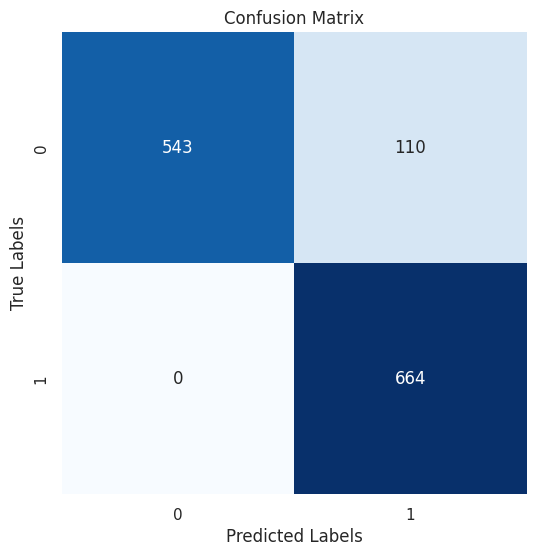


Classification Report (KNN):
              precision    recall  f1-score   support

          NO       1.00      0.83      0.91       653
         YES       0.86      1.00      0.92       664

    accuracy                           0.92      1317
   macro avg       0.93      0.92      0.92      1317
weighted avg       0.93      0.92      0.92      1317



In [ ]:

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report (KNN):")
print(class_report_knn)


In [ ]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.087634,0,0,-0.204040,0.043800,1,0,0,1,0,0,0,1,1,0,0,1,0
1,-0.069807,0,0,-0.853987,-1.435239,1,0,1,0,0,0,0,1,1,0,0,1,0
2,-0.345388,0,0,-0.430782,-0.620258,1,0,0,1,0,0,1,0,1,0,0,1,0
3,0.260890,0,1,1.331751,0.904058,0,1,0,1,0,0,1,0,1,0,1,0,0
4,-1.888643,0,0,0.494847,-1.118302,1,0,1,0,0,0,1,0,0,1,0,1,0


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,1.087043,0,0,Yes,Self-employed,Rural,-0.204413,0.049665,never smoked,YES
1,Female,-0.070744,0,0,No,Self-employed,Rural,-0.854427,-1.455272,never smoked,NO
2,Female,-0.346407,0,0,Yes,Private,Rural,-0.431178,-0.626021,never smoked,YES
3,Male,0.260052,0,1,Yes,Private,Rural,1.331536,0.924986,formerly smoked,YES
4,Female,-1.890122,0,0,No,Private,Urban,0.494546,-1.132786,never smoked,NO


Decision Tree Accuracy: 0.8853


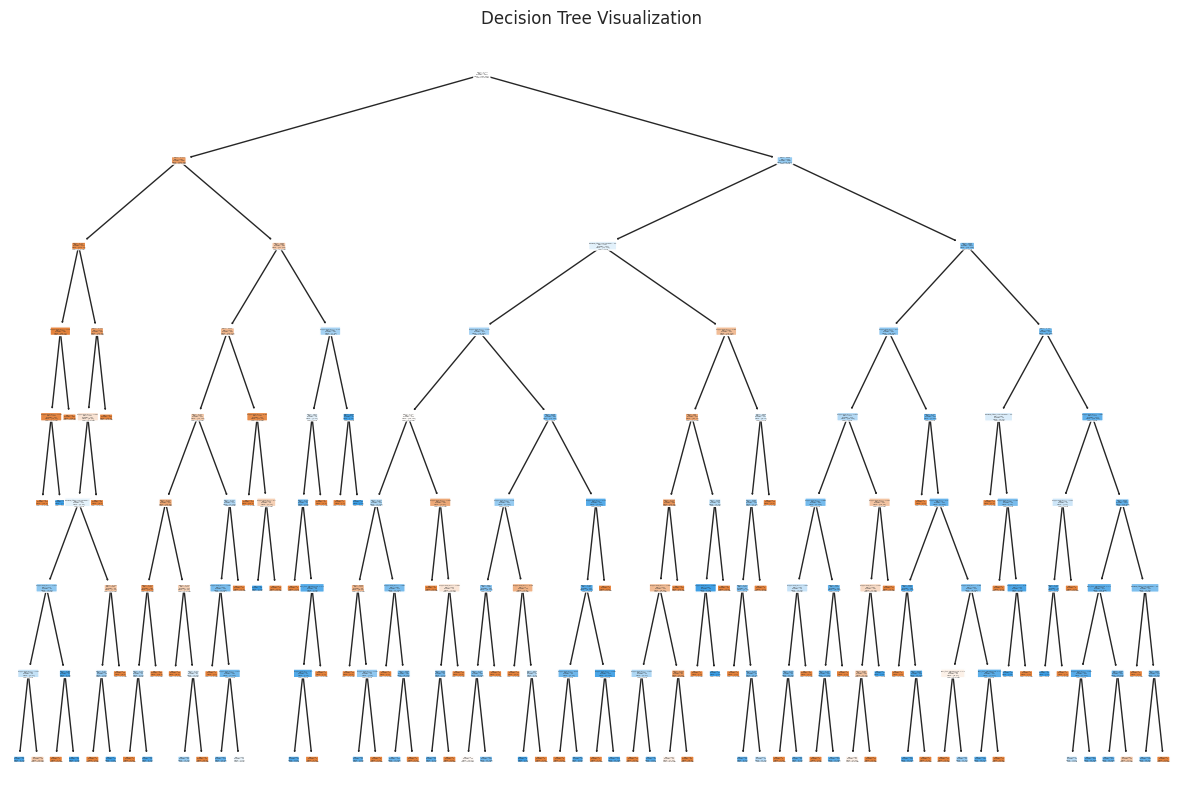

In [ ]:
model_decision_tree = DecisionTreeClassifier(random_state=42)
model_decision_tree.fit(X_train[selected_features], y_train)

# Make predictions on the test set using Decision Tree
y_pred_decision_tree = model_decision_tree.predict(X_test[selected_features])

# Evaluate the Decision Tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {accuracy_decision_tree:.4f}")

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model_decision_tree, feature_names=selected_features, class_names=['No Stroke', 'Stroke'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

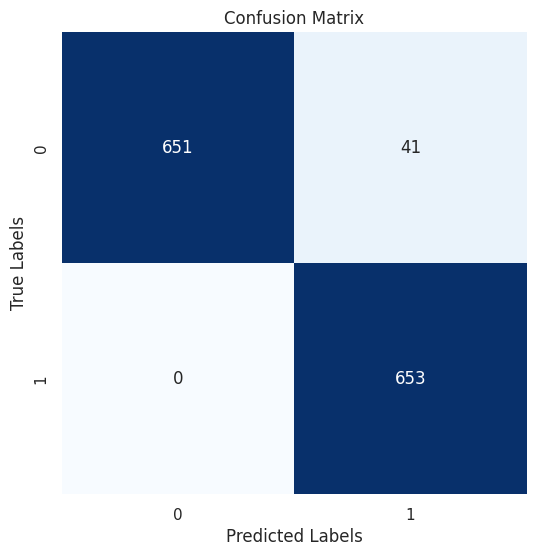

Classification Report:
              precision    recall  f1-score   support

          NO       1.00      0.94      0.97       692
         YES       0.94      1.00      0.97       653

    accuracy                           0.97      1345
   macro avg       0.97      0.97      0.97      1345
weighted avg       0.97      0.97      0.97      1345

Cross-Validation Scores: [0.96877323 0.96577381 0.97842262 0.97395833 0.9672619 ]
Mean Cross-Validation Score: 0.9708379801734821


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_decision_tree)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_decision_tree)
print("Classification Report:")
print(class_report)

# Cross-Validation
cv_scores = cross_val_score(model_decision_tree, X[selected_features], y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))